In [11]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from models.linear_regression import LinearRegressionScratch


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # For displaying animation in notebook


In [13]:

# 1. Load and Prepare the Data
# --- THIS IS THE LINE YOU CHANGE ---
# Use a raw string (r'...') to tell Python to read the path literally.
file_path = r"C:\Users\Shiva\OneDrive\ML_from_stratch\data\Salary_Data.csv"

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found at: {file_path}")
    print("Please make sure you have unzipped the file and the path is correct.")
    exit()

X = df[['YearsExperience']].values
y = df['Salary'].values

# Data normalization is CRUCIAL for gradient descent to work well.
# It's like making sure the units are fair. We scale the data to be smaller.
X_scaled = (X - np.mean(X)) / np.std(X)
y_scaled = (y - np.mean(y)) / np.std(y)


In [14]:


# 2. Initialize and Train the Model
model = LinearRegressionScratch(lr=0.01, epochs=1000)
model.fit(X_scaled, y_scaled)



Epoch 0: Loss = 1.0000
Epoch 100: Loss = 0.0599
Epoch 200: Loss = 0.0433
Epoch 300: Loss = 0.0430
Epoch 400: Loss = 0.0430
Epoch 500: Loss = 0.0430
Epoch 600: Loss = 0.0430
Epoch 700: Loss = 0.0430
Epoch 800: Loss = 0.0430
Epoch 900: Loss = 0.0430


In [15]:

# 3. Create the Animation! This is our "time-lapse" of learning.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the real data as a scatter plot
ax.scatter(X_scaled, y_scaled, label='Actual Data', color='blue', alpha=0.6)

# Initialize a line object that we will update in the animation
line, = ax.plot([], [], 'r-', lw=2, label='Model Prediction')
ax.set_title('Learning Process of Linear Regression')
ax.set_xlabel('Years of Experience (Standardized)')
ax.set_ylabel('Salary (Standardized)')
ax.legend()
ax.grid(True)

# This function will be called for each frame of the animation
def update(frame):
    # We'll skip some frames to make the animation smoother and faster
    # This prevents the animation from running for all 1000 epochs
    frame_index = min(frame * 10, len(model.w_history) - 1)
    
    w = model.w_history[frame_index]
    b = model.b_history[frame_index]
    
    # Generate the prediction line for this frame
    y_pred_frame = w * X_scaled + b
    
    # Update the line data
    line.set_data(X_scaled, y_pred_frame)
    ax.set_title(f'Epoch: {frame_index}')
    return line,

# Create the animation object
# We create 100 frames for the animation
ani = FuncAnimation(fig, update, frames=100, blit=True, interval=30)

# To display the animation in the notebook:
plt.close() # prevent static plot from showing
HTML(ani.to_jshtml())



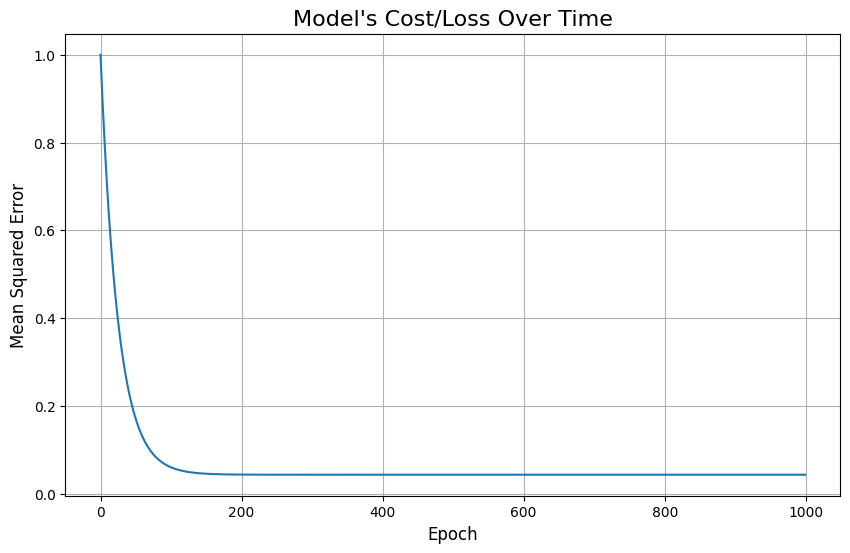

In [16]:

# 4. Plot the Loss Curve (The "Pain" of the Model Decreasing)
plt.figure(figsize=(10, 6))
plt.plot(model.loss_history)
plt.title("Model's Cost/Loss Over Time", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.grid(True)
plt.show()